# Classifying Newswires:
## Multiclass classification example
### Deep Learning with Keras_pg. 78
#### Reuters Dataset

In [1]:
# Step 01: Prepare the Dataset
from keras.datasets import reuters
import numpy as np

(train_data, train_labels), (test_data, test_labels)= reuters.load_data(num_words= 10000)
print('Length of train data:', len(train_data))
print('length of test data:', len(test_data))
word_index= reuters.get_word_index()
reverse_word_index= dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire= ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

# Encoding the Data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence]= 1.
    return results

x_train= vectorize_sequences(train_data)
x_test= vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
    results= np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
        return results
one_hot_train_labels= to_one_hot(train_labels)
one_hot_test_labels= to_one_hot(test_labels)

from keras.utils.np_utils import to_categorical
one_hot_train_labels= to_categorical(train_labels)
one_hot_test_labels= to_categorical(test_labels)

Length of train data: 8982
length of test data: 2246


In [2]:
# Step 02: Building the Network
from keras import models
from keras import layers

model= models.Sequential()
model.add(layers.Dense(64, activation= 'relu', input_shape= (10000,)))
model.add(layers.Dense(64, activation= 'relu'))
model.add(layers.Dense(46, activation= 'softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [3]:
# Step 03: Validation of the model

x_val= x_train[:1000]
partial_x_train= x_train[1000:]

y_val= one_hot_train_labels[:1000]
partial_y_train= one_hot_train_labels[1000:]

# Training the model
history= model.fit(partial_x_train, partial_y_train, epochs=20, batch_size= 512, validation_data= (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 29ms/step - loss: 2.6086 - accuracy: 0.5046 - val_loss: 1.7648 - val_accuracy: 0.6120
Epoch 2/20
16/16 [==============================] - 0s 20ms/step - loss: 1.4408 - accuracy: 0.6849 - val_loss: 1.3546 - val_accuracy: 0.6910
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 1.0662 - accuracy: 0.7699 - val_loss: 1.1664 - val_accuracy: 0.7510
Epoch 4/20
16/16 [==============================] - 0s 20ms/step - loss: 0.8440 - accuracy: 0.8257 - val_loss: 1.0451 - val_accuracy: 0.7820
Epoch 5/20
16/16 [==============================] - 0s 20ms/step - loss: 0.6745 - accuracy: 0.8647 - val_loss: 0.9741 - val_accuracy: 0.7870
Epoch 6/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5407 - accuracy: 0.8903 - val_loss: 0.9639 - val_accuracy: 0.7890
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.4369 - accuracy: 0.9099 - val_loss: 0.9073 - val_accuracy: 0.8060
Epoch 8/20
16

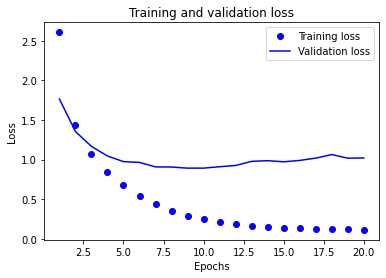

In [4]:
# Step 04: Plotting 
import matplotlib.pyplot as plt

loss= history.history['loss']
val_loss= history.history['val_loss']

epochs= range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label= 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

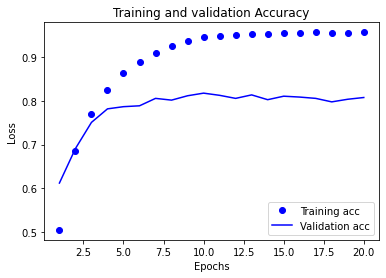

In [5]:
plt.clf()

acc= history.history['accuracy']
val_acc= history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label= 'Training acc')
plt.plot(epochs, val_acc, 'b', label= 'Validation acc')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [6]:
# Step 05: Retraining the model from scratch

model= models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data= (x_val, y_val))
results= model.evaluate(x_test, one_hot_test_labels)
print(results)

import copy
test_labels_copy= copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array= np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

Epoch 1/9
16/16 [==============================] - 1s 27ms/step - loss: 2.5441 - accuracy: 0.5535 - val_loss: 1.7076 - val_accuracy: 0.6550
Epoch 2/9
16/16 [==============================] - 0s 20ms/step - loss: 1.4008 - accuracy: 0.7088 - val_loss: 1.3155 - val_accuracy: 0.7190
Epoch 3/9
16/16 [==============================] - 0s 20ms/step - loss: 1.0403 - accuracy: 0.7776 - val_loss: 1.1335 - val_accuracy: 0.7620
Epoch 4/9
16/16 [==============================] - 0s 19ms/step - loss: 0.8223 - accuracy: 0.8241 - val_loss: 1.0461 - val_accuracy: 0.7770
Epoch 5/9
16/16 [==============================] - 0s 20ms/step - loss: 0.6559 - accuracy: 0.8602 - val_loss: 0.9827 - val_accuracy: 0.7920
Epoch 6/9
16/16 [==============================] - 0s 19ms/step - loss: 0.5292 - accuracy: 0.8880 - val_loss: 0.9436 - val_accuracy: 0.8020
Epoch 7/9
16/16 [==============================] - 0s 19ms/step - loss: 0.4230 - accuracy: 0.9128 - val_loss: 0.9094 - val_accuracy: 0.8150
Epoch 8/9
16/16 [===

0.18655387355298308

In [7]:
# Step 06: Generating predictions on new data
predictions= model.predict(x_test)
print('Size of prediction: ',predictions[0].shape)
print('Sum of first line of predictions: ', np.sum(predictions[0]))
print('The largest entrty in the predicted class: ',np.argmax(predictions[0]))

# A model w/ info bottleneck
model= models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=128,validation_data=(x_val, y_val))
res= model.evaluate(partial_x_train, partial_y_train)
print(res)

Size of prediction:  (46,)
Sum of first line of predictions:  0.9999999
The largest entrty in the predicted class:  3
Epoch 1/20
63/63 [==============================] - 1s 13ms/step - loss: 3.0274 - accuracy: 0.1080 - val_loss: 2.3138 - val_accuracy: 0.5790
Epoch 2/20
63/63 [==============================] - 1s 10ms/step - loss: 1.8201 - accuracy: 0.6035 - val_loss: 1.5868 - val_accuracy: 0.6020
Epoch 3/20
63/63 [==============================] - 1s 10ms/step - loss: 1.3694 - accuracy: 0.6329 - val_loss: 1.4516 - val_accuracy: 0.6180
Epoch 4/20
63/63 [==============================] - 1s 10ms/step - loss: 1.1863 - accuracy: 0.6695 - val_loss: 1.4078 - val_accuracy: 0.6300
Epoch 5/20
63/63 [==============================] - 1s 10ms/step - loss: 1.0571 - accuracy: 0.7130 - val_loss: 1.3661 - val_accuracy: 0.6630
Epoch 6/20
63/63 [==============================] - 1s 10ms/step - loss: 0.9536 - accuracy: 0.7566 - val_loss: 1.3804 - val_accuracy: 0.6930
Epoch 7/20
63/63 [==================